In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Chloë Smith (1877342)
#Philani Mpofu (1848751)
#Matthew Kruger (1669326)
#Jesse Bristow (1875955)

In [3]:
image = img.imread('peppers.bmp')
persimmon = img.imread('persimmons.jpg')

In [4]:
print(image.shape)

(512, 512, 3)


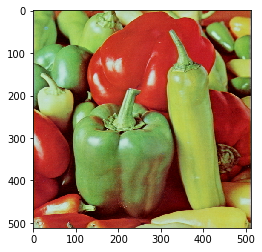

In [5]:
plt.imshow(img.imread('peppers.bmp'))

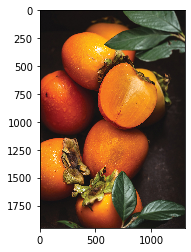

In [6]:
plt.imshow(img.imread('persimmons.jpg'))

In [7]:
print(image[0][0])

[0 0 0]


In [8]:
# error (objective) function

def objective(image, new_image):
    err = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            point = image[i][j]
            centroid = new_image[i][j]
            err += (np.linalg.norm(point-centroid) ** 2)
    err *= 0.5
    return err

In [9]:
# k-means clustering of an image into k clusters, returns new centroid values and 3D array representing cluster assignments

def k_means_clustering(k, clusters, image):
    new_image = image.copy()
    
    # assign each pixel to closest centroid - working
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # j-th pixel of i-th row in image
            pixel = image[i][j]
            # deal with RGB values of individual pixel
            distances = np.empty(k)
        
            for n in range(k):
                # calculate Euclidean distance between point and each cluster
                distances[n] = np.linalg.norm(pixel-clusters[n])
            
            idx = np.argmin(distances, axis=0)
            new_image[i][j] = clusters[idx]
        
    # move each centroid to average of pixels in cluster
    new_clusters = clusters.copy()
    for n in range(k):
        centroid = clusters[n]
        new_centroid = np.zeros(3)
        count = 0
        # add each colour value of pixel in n-th cluster to new_centroid to find mean
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                pixel_cluster = new_image[i][j]
                pixel = image[i][j]
                if np.array_equal(pixel_cluster, centroid):
                    new_centroid += pixel
                    count += 1
        # find mean colour of pixels in n-th cluster, change clusters[n]
        if count != 0:
            new_centroid /= count
        new_centroid = new_centroid.astype(int)
        new_clusters[n] = new_centroid
        
    return new_clusters, new_image

[[114 252 225]
 [108  48 223]]
[[156 186 103]
 [134  57  34]]


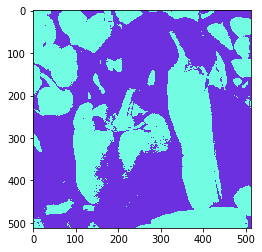

iteration 1


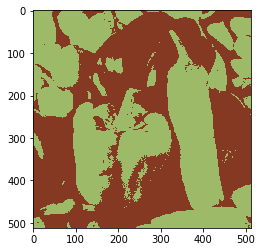

iteration 2


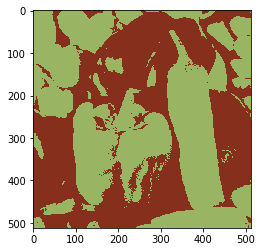

iteration 3


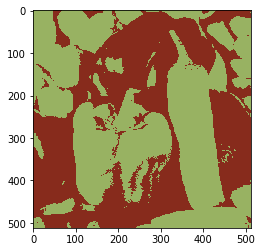

iteration 4


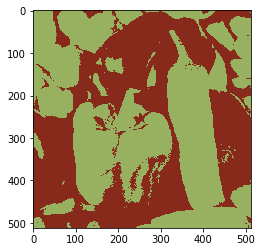

Wall time: 44.3 s


In [11]:
%%time
k = 2
clusters = np.random.randint(0, 255, (2, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, image)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, image)

    plt.imshow(new_image)
    plt.show()
    
    count += 1

[[174 182 123]
 [124 168 180]
 [ 92 165 157]
 [243 181 223]]
[[162 124  69]
 [155 205 172]
 [ 79  62  31]
 [198 216 197]]


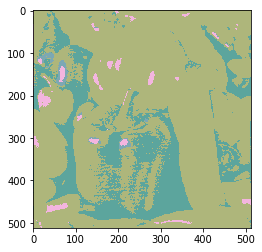

iteration 1


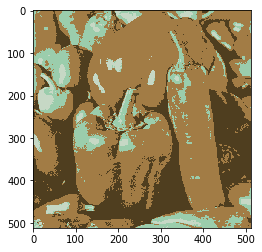

iteration 2


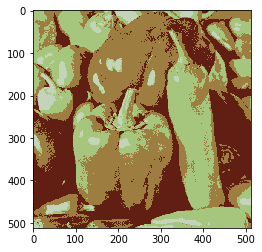

iteration 3


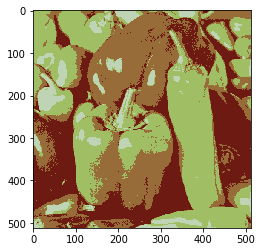

iteration 4


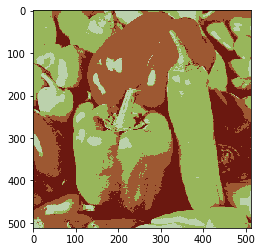

iteration 5


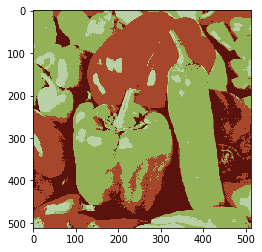

iteration 6


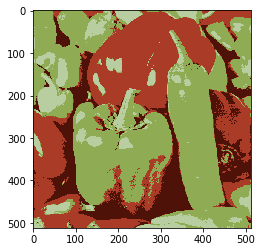

iteration 7


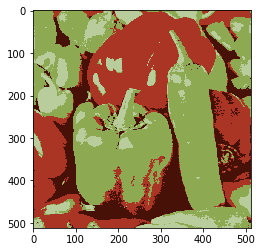

iteration 8


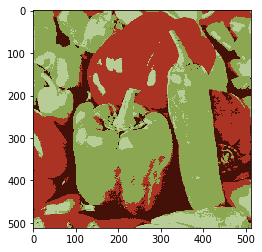

iteration 9


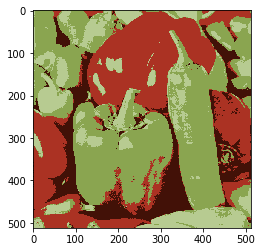

iteration 10


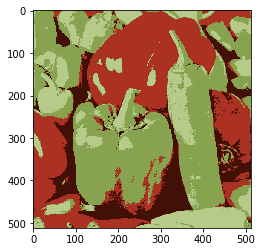

iteration 11


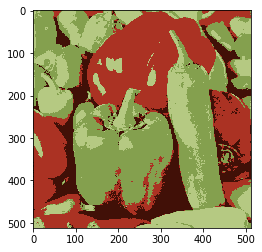

iteration 12


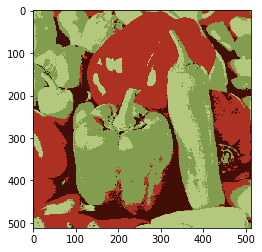

iteration 13


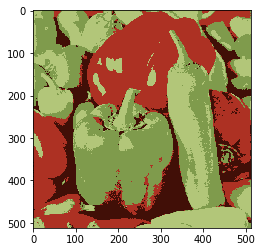

iteration 14


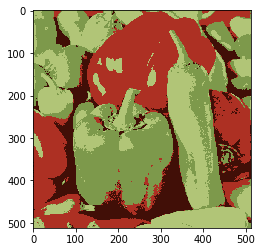

iteration 15


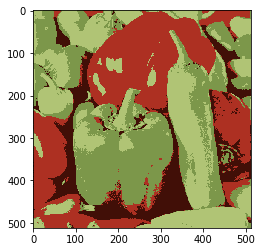

Wall time: 4min 3s


In [12]:
%%time
k = 4
clusters = np.random.randint(0, 255, (4, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, image)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, image)

    plt.imshow(new_image)
    plt.show()
    
    count += 1

[[116 154 223]
 [ 40   8   8]
 [ 41  78  92]
 [185 173  67]
 [149 235 175]
 [115 212 174]
 [ 11 187  31]
 [ 69  40 132]]
[[  0   0   0]
 [ 97  19  12]
 [104 102  51]
 [162 134  69]
 [184 210 168]
 [132 188 126]
 [ 91 149  55]
 [162  42  44]]


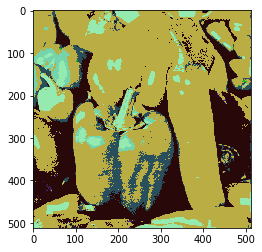

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
[[ 51   6   2]
 [127  29  20]
 [109 107  52]
 [191 116  75]
 [184 208 168]
 [171 192  92]
 [124 165  83]
 [187  48  36]]


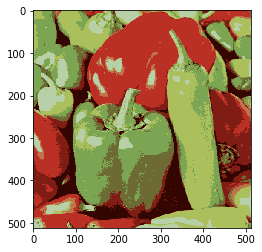

Wall time: 11h 39min 41s


In [14]:
%%time
k = 8
clusters = np.random.randint(0, 255, (8, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, image)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, image)
    
    count += 1

print(new_clusters)
plt.imshow(new_image)
plt.show()

[[159  41 107]
 [179 112   2]
 [ 33 202  48]
 [213  16 219]
 [147  33 187]
 [115 229 197]
 [190 138 235]
 [153 251  89]
 [160  77  76]
 [221  29 140]
 [ 27 109 168]
 [189  99 186]
 [ 10  49  67]
 [ 42 133  63]
 [195 208  13]
 [ 65 200 163]]
[[  0   0   0]
 [170  91  32]
 [111 180  68]
 [  0   0   0]
 [  0   0   0]
 [178 212 175]
 [207 203 191]
 [159 189  95]
 [160  63  41]
 [239 112 112]
 [  0   0   0]
 [202 157 136]
 [ 54   8   3]
 [105 144  69]
 [180 179  71]
 [119 177 115]]


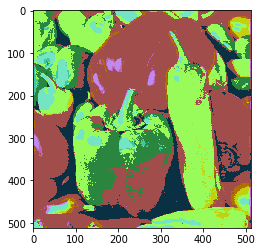

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10


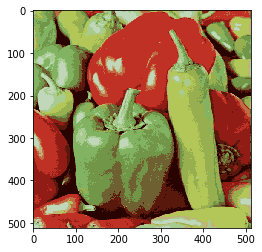

iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20


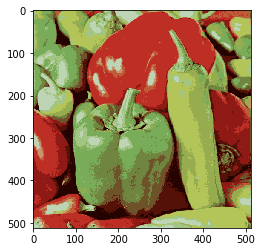

iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30


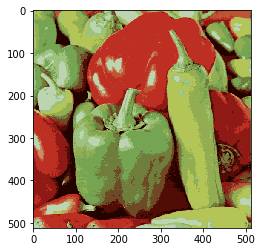

iteration 31
iteration 32
[[ 35   3   0]
 [189  46  35]
 [111 123  60]
 [ 35   3   0]
 [ 35   3   0]
 [156 194 127]
 [189 212 177]
 [147 174  83]
 [142  25  21]
 [189  84  51]
 [ 35   3   0]
 [199 138 100]
 [ 79  13   6]
 [108  73  36]
 [180 197  88]
 [117 164  82]]


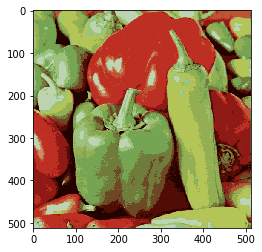

Wall time: 1h 28min 24s


In [15]:
%%time
k = 16
clusters = np.random.randint(0, 255, (16, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, image)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, image)
    
    if count % 10 == 0:
        plt.imshow(new_image)
        plt.show()
    
    count += 1

print(new_clusters)
plt.imshow(new_image)
plt.show()

[[176   6 123]
 [120 149  82]
 [236 216  50]
 [231  94 186]
 [251 149  20]
 [ 24  36 198]
 [155 138  94]
 [200 218  92]
 [105 245 232]
 [166 131  25]
 [179 174 158]
 [ 84 180   6]
 [251  23 233]
 [131  31   2]
 [ 10  35 224]
 [ 94 170 189]
 [  0  89   5]
 [140 221 221]
 [138 168 201]
 [ 18 144 120]
 [140  15  71]
 [ 78  46 169]
 [ 52  88  93]
 [181 118 171]
 [186 248 164]
 [ 87 243 230]
 [170 134 191]
 [ 29  47  26]
 [176 177  48]
 [ 77 206  86]
 [ 60  28  45]
 [ 16 216  19]]
[[208  68  75]
 [119 154  77]
 [  0   0   0]
 [240 131 131]
 [223 101  70]
 [  0   0   0]
 [164 148  90]
 [181 200  94]
 [  0   0   0]
 [180  83  45]
 [173 194 144]
 [ 85 120  26]
 [  0   0   0]
 [148  37  24]
 [  0   0   0]
 [118 182 150]
 [  0   0   0]
 [178 217 200]
 [141 202 170]
 [  0   0   0]
 [189  46  39]
 [  0   0   0]
 [ 87  97  48]
 [216 128 124]
 [190 218 182]
 [  0   0   0]
 [  0   0   0]
 [ 29   8   1]
 [166 182  76]
 [118 192 105]
 [ 70  16   8]
 [  0   0   0]]


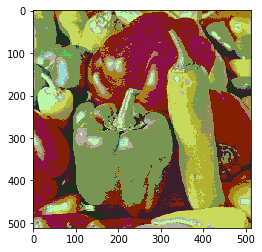

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10


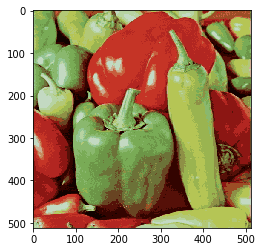

iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20


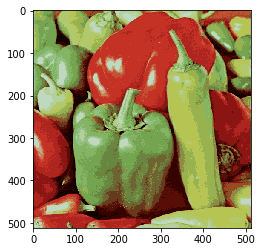

iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30


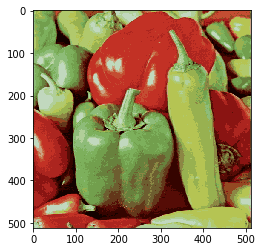

iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40


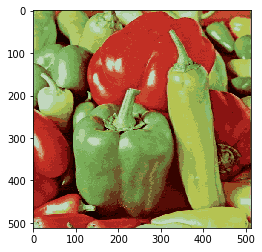

iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50


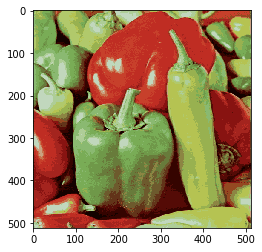

iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60


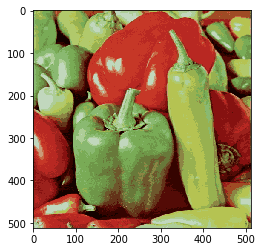

iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
[[183  40  33]
 [104 118  57]
 [ 20   2   0]
 [201 151 117]
 [198  54  39]
 [ 20   2   0]
 [140 133  68]
 [181 195  82]
 [ 20   2   0]
 [162  75  37]
 [177 201 107]
 [110  86  44]
 [ 20   2   0]
 [132  16  15]
 [ 20   2   0]
 [120 170  85]
 [ 20   2   0]
 [193 215 189]
 [137 185 112]
 [ 20   2   0]
 [154  32  27]
 [ 20   2   0]
 [ 99  51  24]
 [200 100  67]
 [175 204 150]
 [ 20   2   0]
 [ 20   2   0]
 [ 52   4   0]
 [152 177  80]
 [108 148  70]
 [ 82  11   5]
 [ 20   2   0]]


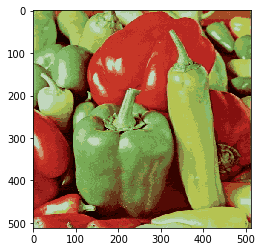

Wall time: 2h 29min 33s


In [16]:
%%time
k = 32
clusters = np.random.randint(0, 255, (32, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, image)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, image)
    
    if count % 10 == 0:
        plt.imshow(new_image)
        plt.show()
    
    count += 1

print(new_clusters)
plt.imshow(new_image)
plt.show()

[[132 213 229]
 [158  93  85]
 [101  14  28]
 [  2 135 207]
 [227   9  58]
 [236 195  69]
 [178 254 201]
 [168  62 218]
 [232 219 223]
 [235  88  21]
 [ 56  59 134]
 [ 52  64 134]
 [136 219  85]
 [183  71 127]
 [ 53  93  67]
 [183  32 121]
 [189  24  77]
 [250 245 107]
 [125  56 180]
 [165 194  71]
 [ 11  18  91]
 [ 15 186 117]
 [183  27 178]
 [ 22 152 148]
 [ 95  42 214]
 [ 34  64  61]
 [ 51  21 147]
 [211  25  63]
 [121 112 177]
 [113 244 166]
 [233 111  42]
 [198 248  38]
 [246 116  10]
 [140 204   6]
 [ 65  20  52]
 [254 134 232]
 [130  51 224]
 [164  69  65]
 [  7 205 117]
 [ 92  33 171]
 [229  22  14]
 [191  84 212]
 [105 156 219]
 [ 89 200 245]
 [115  19  93]
 [ 97 108 165]
 [204 145 178]
 [ 64 144 202]
 [121  63 173]
 [ 85  53 126]
 [189  92 101]
 [ 44 100  74]
 [110  20 235]
 [147 254  59]
 [154 195  83]
 [ 73 148  93]
 [ 59  19 151]
 [ 63 242 163]
 [ 45 187 148]
 [ 16 105 161]
 [ 69  63 149]
 [117 138  65]
 [199 186 160]
 [ 99 216  84]]
[[153 208 183]
 [152 110  68]
 [105  21

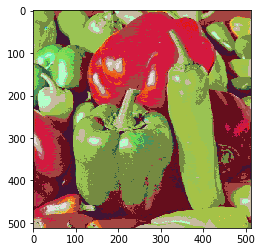

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
[[147 193 138]
 [112  87  45]
 [ 79   6   4]
 [ 19   2   0]
 [ 19   2   0]
 [180 151  66]
 [182 207 153]
 [ 19   2   0]
 [193 216 191]
 [197  52  38]
 [ 19   2   0]
 [ 19   2   

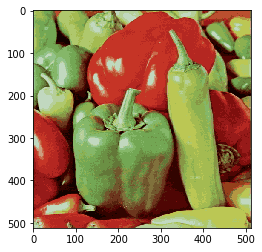

Wall time: 4h 10min 13s


In [18]:
%%time
k = 64
clusters = np.random.randint(0, 255, (64, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, image)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, image)
    
    count += 1

print(new_clusters)
plt.imshow(new_image)
plt.show()

We notice for k = {4, 8, 16, 32, 64} that the algorithm has improved results (the redrawn image looks more and more like the original photo) but has diminishing returns versus the extremely long runtime for k greater than 8. 

Note: the long runtime for k = 8 was because I closed my laptop for the night and it finished running in the morning :)

[[ 29 201 195]
 [245  37 223]
 [140 117  90]
 [119  40 125]]
[[202 221 219]
 [252 247 235]
 [182 112  49]
 [ 45  27  23]]


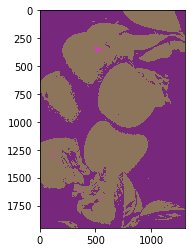

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
[[118  70  45]
 [169 163 115]
 [229 121  35]
 [ 36  27  23]]


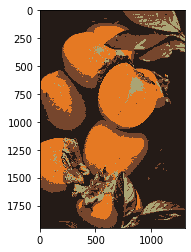

Wall time: 57min 4s


In [20]:
%%time
k = 4
clusters = np.random.randint(0, 255, (4, 3))
clusters0 = clusters

# do one iteration, then loop until convergence
new_clusters, new_image = k_means_clustering(k, clusters, persimmon)

print(clusters0)
print(new_clusters)
plt.imshow(new_image)
plt.show()

count = 1
while not np.allclose(clusters, new_clusters, rtol=0.01):
    print("iteration %d" % count)
    
    clusters = new_clusters.copy()
    new_clusters, new_image = k_means_clustering(k, new_clusters, persimmon)
    
    count += 1

print(new_clusters)
plt.imshow(new_image)
plt.show()